In [4]:
ls experiments/results/cone_avoid_oracle/

20250510_181728/  20250511_222454/  20250522_070437/  20250522_204443/
20250510_181907/  20250511_222527/  20250522_070729/  20250616_194436/
20250510_182040/  20250511_222600/  20250522_071021/  20250616_194521/
20250510_182214/  20250511_222633/  20250522_100527/  20250616_194559/
20250510_182348/  20250511_222706/  20250522_100859/  20250616_194636/
20250510_182520/  20250511_222740/  20250522_101254/  20250616_194716/
20250510_182653/  20250511_222813/  20250522_101648/  20250616_213444/
20250510_182825/  20250511_222846/  20250522_101930/  20250616_213532/
20250510_182958/  20250514_172701/  20250522_102216/  20250616_213617/
20250510_183130/  20250514_194253/  20250522_102508/  20250616_213707/
20250511_113302/  20250514_200353/  20250522_114224/  20250616_213748/
20250511_113451/  20250521_183557/  20250522_135237/  20250617_195218/
20250511_113631/  20250521_183836/  20250522_171919/  20250617_195304/
20250511_113804/  20250521_184108/  20250522_171945/  20250617_195349/
202505

In [5]:
ls experiments/results/cone_avoid_naive_Be_careful/

20250514_172851/  20250521_194959/  20250522_083329/  20250617_195819/
20250514_194354/  20250521_195145/  20250522_083723/  20250617_195913/
20250514_200459/  20250521_195332/  20250522_084104/  20250619_114532/
20250521_194255/  20250522_082532/  20250616_213826/  20250619_114951/
20250521_194441/  20250522_082719/  20250617_195603/  20250626_063506/
20250521_194627/  20250522_082905/  20250617_195645/  20250706_184513/
20250521_194813/  20250522_083052/  20250617_195732/  20250706_205532/


In [6]:
ls experiments/results/cone_avoid_adapt_gated_llm_Be_careful/

20250522_141300/  20250617_200424/  20250617_200721/  20250626_063630/
20250522_180444/  20250617_200522/  20250617_200812/  20250706_205627/
20250522_204630/  20250617_200626/  20250619_115314/


/tmp/ipykernel_967283/899097409.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['reward_opt'][i] = np.dot(np.array(df1['features'][i]), opt_weights)
/tmp/ipykernel_967283/899097409.py:29: SettingWithCopyWarning: 
A value is trying t

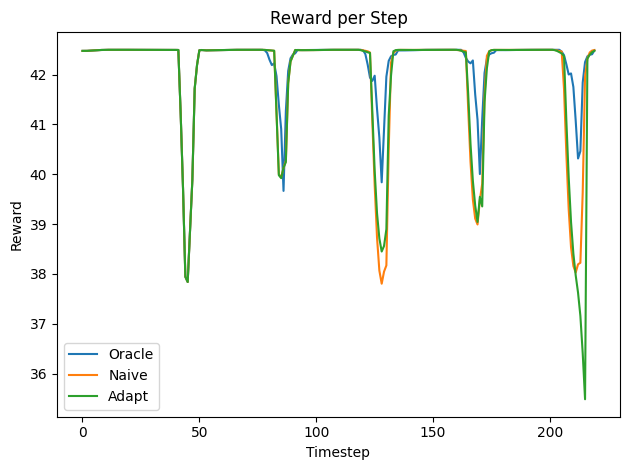

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Replace with your actual JSON file paths
oracle = 'experiments/results/cone_avoid_oracle/20250706_205505/experiment_results.json'
file2 = 'experiments/results/cone_avoid_naive_Be_careful/20250706_205532/experiment_results.json'
file3 = 'experiments/results/cone_avoid_adapt_gated_llm_Be_careful/20250706_205627/experiment_results.json'
# Load JSON data
with open(oracle, 'r') as f:
    data1 = json.load(f)
with open(file2, 'r') as f:
    data2 = json.load(f)
with open(file3, 'r') as f:
    data3 = json.load(f)
# Convert to DataFrames
df1 = pd.DataFrame(data1['steps'])
df2 = pd.DataFrame(data2['steps'])
df3 = pd.DataFrame(data3['steps'])
# Display DataFrames
# import ace_tools as tools; tools.display_dataframe_to_user(name="Run 1 Steps", dataframe=df1[['timestep', 'reward']])
# tools.display_dataframe_to_user(name="Run 2 Steps", dataframe=df2[['timestep', 'reward']])
# Plot reward per step
opt_weights = np.array([5.0, 2.5, 20.0, 15.0])
df1['reward_opt'] = [0] * len(df1['timestep'])
df2['reward_opt'] = [0] * len(df2['timestep'])
df3['reward_opt'] = [0] * len(df3['timestep'])
for i in range(len(df1['timestep'])):
    df1['reward_opt'][i] = np.dot(np.array(df1['features'][i]), opt_weights)
for i in range(len(df2['timestep'])):
    df2['reward_opt'][i] = np.dot(np.array(df2['features'][i]), opt_weights)
for i in range(len(df3['timestep'])):
    df3['reward_opt'][i] = np.dot(np.array(df3['features'][i]), opt_weights)
plt.figure()
plt.plot(df1['timestep'], df1['reward_opt'], label='Oracle')
plt.plot(df2['timestep'], df2['reward_opt'], label='Naive')
plt.plot(df3['timestep'], df3['reward_opt'], label='Adapt')
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.title('Reward per Step')
plt.legend()
plt.tight_layout()
# plt.xlim(350, 400)
plt.show()